# SIMPLE LINEAR REGRESSION 

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

# STEP 1: Read and Understand the data 

Let's start with the following steps:

    1.Importing data using the pandas library
    2.Understanding the structure of the data

In [8]:
# supress warnings 

import warnings 
warnings.filterwarnings('ignore')

In [9]:
# import required packages 

import pandas as pd 
import numpy as np 

In [10]:
# Read the given csv file , and view the sample records 

df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [11]:
df.shape

(200, 4)

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Step 2: Visualising the data 
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Sales.

In [14]:
# import required packages 

import matplotlib.pyplot as plt 
import seaborn as sns 

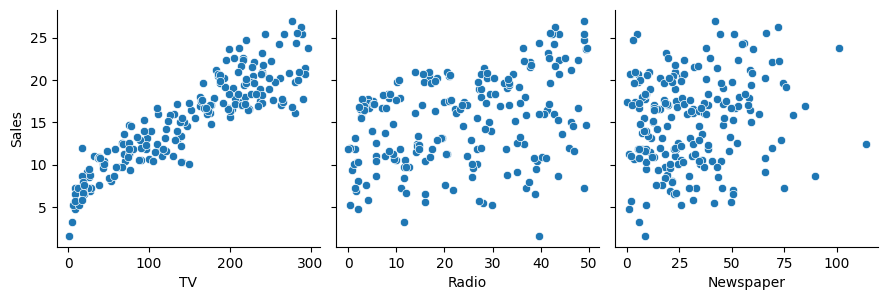

In [15]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars = 'Sales' , size=3 , aspect=1 , kind='scatter')
plt.show()

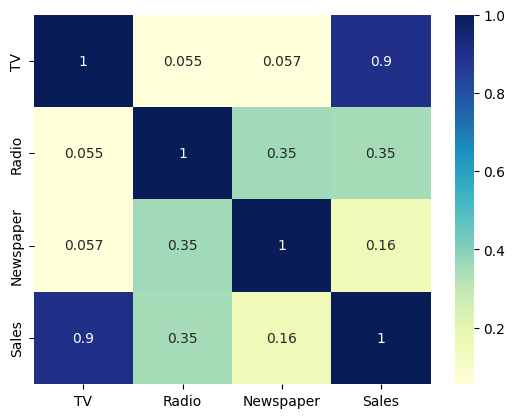

In [16]:
sns.heatmap(df.corr(), cmap = "YlGnBu" , annot = True )
plt.show()

As it is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [17]:
X = df['TV']
y = df['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [18]:
import sklearn 

In [19]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X, y , train_size = 0.70 , test_size = 0.30 , random_state = 100 )

In [20]:
# Let's take a look at train dataset 

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [21]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### BUILDING A LINEAR MODEL 
you first need to import the `statsmodel.api` library using which you'll perform the linear regression 

In [22]:
import statsmodels
import statsmodels.api as sm 

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [23]:
# Add a constant to get an intercept 

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [24]:
# Fit the regression line using OLS 

lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()

In [25]:
# Print the parameters , i.e the intercept and the slope of the regression line fitted 

lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
# Performing summary operations to list out all the different parameters of the regression line fitted 

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.52e-52
Time:                        23:24:35   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

####  Looking at some key statistics from the summary
The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.
##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`
This is a decent R-squared value.
##### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.


---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

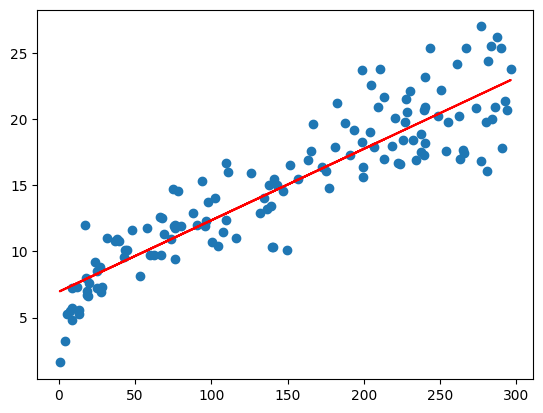

In [27]:
plt.scatter(X_train , y_train )
plt.plot(X_train ,6.948 +  0.054 * X_train , 'r')
plt.show()

## Step 4: Residual Analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [28]:
y_train_pred = lr_model.predict(X_train_sm)

res =( y_train - y_train_pred )

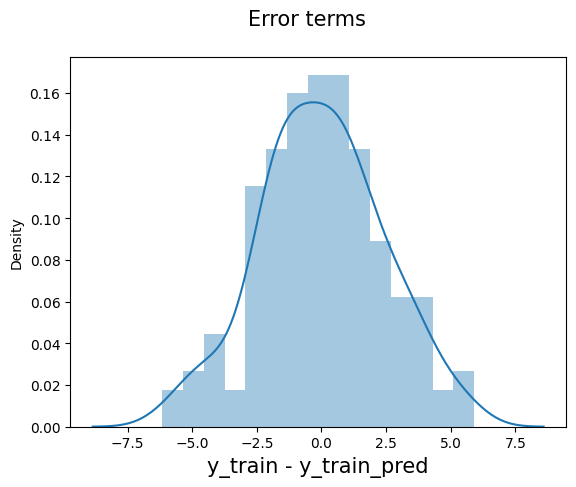

In [29]:
plt.figure()
sns.distplot(res, bins= 15)
plt.suptitle('Error terms ', fontsize=15)                   # Plot tile 
plt.xlabel('y_train - y_train_pred', fontsize =15)          # X-label 
plt.show()

The residuals are following a normally distributed with mean 0. All good!

#### Looking for patterns in residuals 

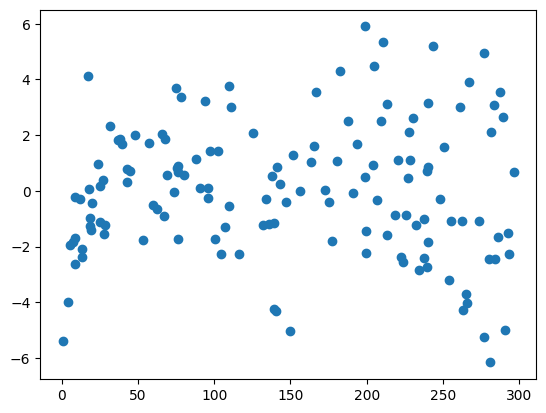

In [30]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set 
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [31]:
# Add a constant to the X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr_model.predict(X_test_sm)

In [32]:
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [33]:
# Import required packages for evaluation 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at RMSE 

In [34]:
# Returns the mean squared error; we'll take a square root  

np.sqrt(mean_squared_error(y_true= y_test, y_pred= y_test_pred ))

np.float64(2.0192960089662324)

##### Checking the R-squared on the test set 

In [35]:
r2 = r2_score(y_test,y_test_pred)
r2

0.7921031601245658

##### Visualising the fit on the test set 

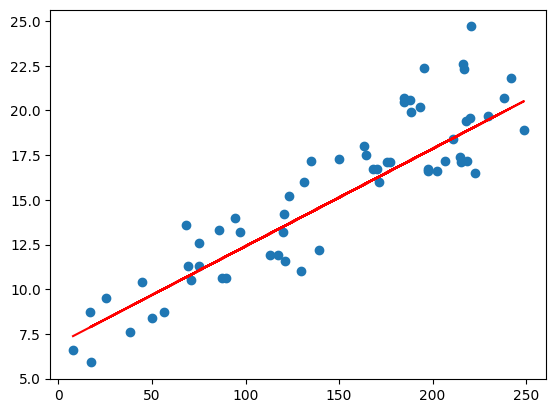

In [36]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred,'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn` 

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [37]:
from sklearn.model_selection import train_test_split 
X_train_lm , X_test_lm , y_train_lm , y_test_lm = train_test_split(X, y , train_size = 0.70 , test_size = 0.30 , random_state = 100 )

In [38]:
X_train_lm.shape

(140,)

In [39]:
# Reshape the train and test set 
X_train_lm = X_train_lm.values.reshape(-1,1)

X_test_lm = X_test_lm.values.reshape(-1,1)

In [40]:
print(X_train_lm.shape)
print(X_test_lm.shape)
print(y_train_lm.shape)
print(y_test_lm.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [41]:
# Import required modules to perform linear regression using sklearn 
from sklearn.linear_model import LinearRegression 

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm , y_train_lm)

LinearRegression()

In [42]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


The equation that we get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

---
## Addressing some common questions/doubts on Simple Linear Regression
---

### Q: Why is it called 'R-squared'?

Ans: It is called R-squared because it is the square of the correlation coefficient (R) and represents the explained proportion of variance in regression models.

In [43]:
corrs = np.corrcoef(X_train,y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [44]:
corrs[0,1] **2

np.float64(0.8157933136480386)

Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

Ans: Root Mean Squared Error is a measure of how well a model's predictions match the actual values. A good RMSE depends on the context of the problem and the scale of the data. There is no universal "good" RMSE. Its not always important to aim for a very low RMSE as it may indicate overfitting. 

### Q: Does scaling have an impact on the model? When should I scale?

Ans: Yes! Scaling has a big impact on machine learning models. We should scale when features have very different ranges.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### SciKit Learn has these scaling utilities handy

In [46]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

 One aspect that you need to take care of is that the `fit_transform` can be performed on 2D arrays only. So you need to
 reshape your `X_train_scaled` and `y_trained_scaled` data in order to perform the standardisation.

In [47]:
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

X_train_scaled.shape


(140, 1)

In [48]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled ,X_train_scaled).fit() 

In [49]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()

#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [50]:
print("mean and standard deviation for X_train_scaled:", np.mean(X_train_scaled),",",np.std(X_train_scaled))
print("mean and standard deviation for y_train_scaled:", np.mean(y_train_scaled),",",np.std(y_train_scaled))

mean and standard deviation for X_train_scaled: 1.45915026093592e-16 , 0.7071067811865476
mean and standard deviation for y_train_scaled: -2.5376526277146434e-16 , 1.0


In [51]:
# Check the parameters
lr_scaled.params

array([6.9486832 , 0.05454575])

As you might notice, the value of the parameters have changed since we have changed the scale.Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [52]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.52e-52
Time:                        23:24:43   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation 
- Faster convergence of gradient descent